## Probleme 3  Regroupement de données Textuelles

### A PROPOS DU DATASET
Grand ensemble de données sur les critiques de films
Il s'agit d'un ensemble de données pour la classification des sentiments binaires contenant beaucoup plus de données que les ensembles de données de référence précédents. Nous fournissons un ensemble de 25 000 critiques de films très polaires pour la formation et 25 000 pour les tests. Il existe également des données supplémentaires non étiquetées à utiliser. Des formats de texte brut et de sac de mots déjà traités sont fournis. 


## 2. Donner la formulation mathématique du problème

Probleme d'apprentissage non supervisé qui consiste a regrouper differents avis quasi semblables de diffferents utilisateurs a travers lalgoritme de k-means plus precisement la methode elbow ou methode du coude
#### Elbow method
La méthode du coude est une méthode utilisée pour déterminer le nombre optimal de clusters pour le clustering k-means. Elle consiste à ajuster le modèle avec différentes valeurs de k et à tracer la somme des erreurs carrées (SSE) pour chaque valeur de k. La SSE est la somme des distances carrées entre chaque point et son centre de cluster le plus proche. L'idée derrière la méthode du coude est que, à mesure que le nombre de clusters augmente, la SSE diminue, mais à un certain moment, la diminution de la SSE ralentira et se stabilisera, formant une forme de coude sur le graphique. Le nombre de clusters correspondant au point "coude" sur le graphique est considéré comme le nombre optimal de clusters.


 Voici la formulation mathématique de la distance entre un point de données x et un centroïde μ :

d(x,μ) = ∑i=1nd(xi,μi)^2

Où :

##### n est le nombre de dimensions des données
##### xi est la i-ème dimension du point de données x
##### μi est la i-ème dimension du centroïde μ
##### d(xi,μi) est la distance entre la i-ème dimension du point de données x et la i-ème dimension du centroïde μ

Le k-means est un algorithme de clustering qui permet de diviser un ensemble de données en k clusters (où k est un paramètre spécifié à l'avance). L'algorithme k-means utilise une technique de minimisation de la somme des écarts au carré (SSE) pour déterminer les k clusters.

In [1]:
# Importation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from matplotlib import colors
from scipy import sparse as sp
from mpl_toolkits import mplot3d


In [2]:
# Import dataset
data_train = load_files('C:/Users/diarr/Bureau/aclImdb/train')
data_test = load_files('C:/Users/diarr/Bureau/aclImdb/test')

In [13]:
#Exploration 
print(len(data_train.data))

75000


In [15]:
df = np.array(data_test.data)
df1 = np.array(data_train.data)

In [16]:
#taille
print(df.shape)
#print(df1.shape)

(25000,)


In [18]:
ma_data = np.array(data_test.target)
#ma_data1 = np.array(data_train.target)
len(ma_data)
#len(ma_data1)

25000

In [19]:
data = pd.DataFrame(df)
data['target'] = ma_data
data

,0,target
0,"b""Don't hate Heather Graham because she's beau...",1
1,b'I don\'t know how this movie has received so...,0
2,"b""I caught this movie on the Horror Channel an...",1
3,b'NBC had a chance to make a powerful religiou...,0
4,"b""Looking for something shocking? Okay fine......",0
...,...,...
24995,"b""After watching Tipping the Velvet by Sarah w...",1
24996,"b""The three main characters are all hopeless, ...",1
24997,b'I haven\'t reviewed on IMDb before but this ...,0
24998,b'Forget what I said about Emeril. Rachael Ray...,0


In [20]:
# decortication de la chaine de caractère en mot et association d'un vecteur à chaque mot
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df)
X_counts.shape

(25000, 73822)

In [21]:
# fit and transform
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [22]:
## Entrainement du Modèle

C:\Users\diarr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\diarr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\diarr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\diarr\anaconda3\lib\site-

C:\Users\diarr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\diarr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\diarr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\diarr\anaconda3\lib\site-

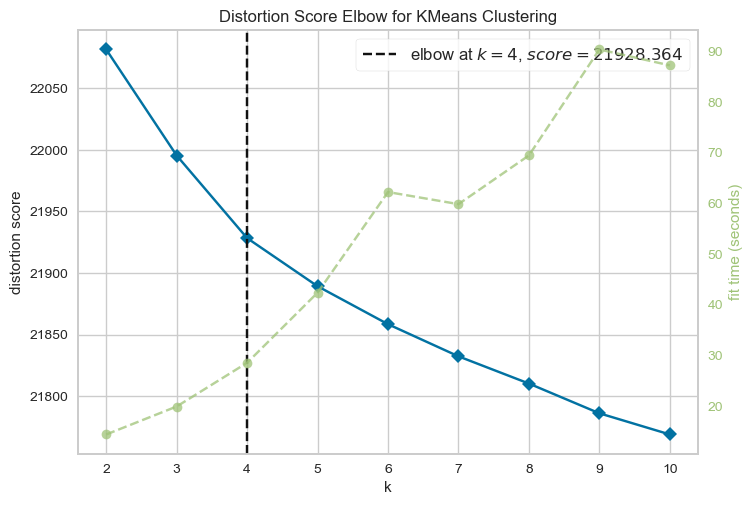

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# méthode Elbow pour trouver le nombre de clusters à réaliser.
Elbow_M = KElbowVisualizer(KMeans(random_state = 0), k=10, random_state=0)
Elbow_M.fit(X_tfidf)
Elbow_M.show()

In [23]:
# K-means implementation
kmeans = KMeans(n_clusters = 5, n_init = 25, random_state = 2)
kmeans 

KMeans(n_clusters=5, n_init=25, random_state=2)

In [24]:
# Prediction des cluster
model = kmeans.fit(X_tfidf)
yhat = model.predict(X_tfidf)
print(yhat[:10])


[2 1 3 2 1 2 2 3 4 0]


In [25]:
## Reduction de la dimentionalité 

In [26]:
pca = TruncatedSVD(3)
pca.fit(X_tfidf)
PCA_ds = pd.DataFrame(pca.transform(X_tfidf), columns = (["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,25000.0,0.332336,0.089619,0.011322,0.270335,0.329290,0.391194,0.671597
col2,25000.0,-0.003193,0.085857,-0.160155,-0.068684,-0.025352,0.045160,0.689083
col3,25000.0,0.001232,0.080607,-0.260586,-0.056176,-0.004700,0.052869,0.368807


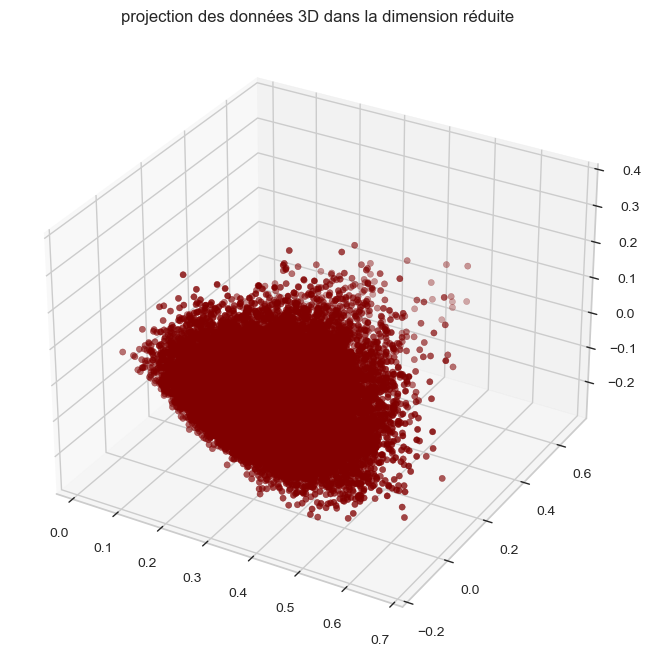

In [27]:
# Presentation 3D apres la reduction
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
#To plot
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "maroon", marker = "o" )
ax.set_title("projection des données 3D dans la dimension réduite")
# ax.view_init(10,azim=36O)
plt.show()

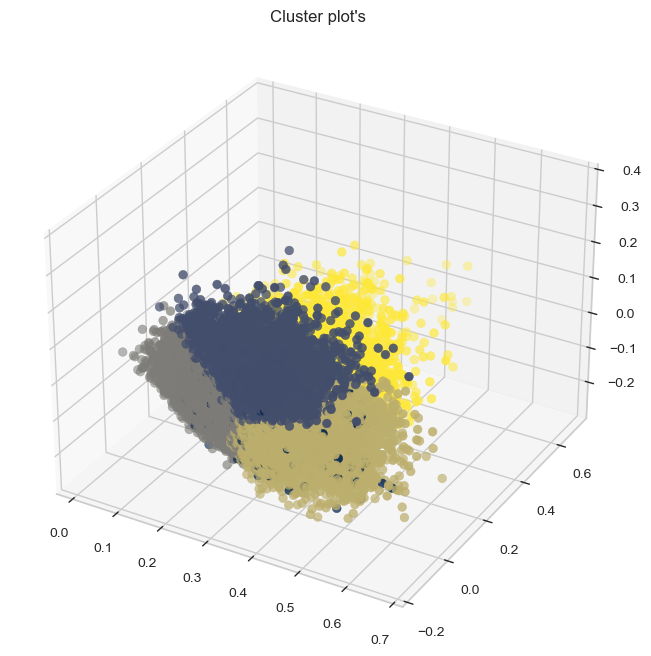

In [28]:
PCA_ds["Clusters"] = yhat
#Plotting the clusters
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x, y, z, s = 40, c = PCA_ds["Clusters"], marker = 'o', cmap = 'cividis')
ax.set_title("Cluster plot's")
plt.show()